<a href="https://colab.research.google.com/github/ywang1110/NLP/blob/main/Techinical_Interview_Question_pair_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://miro.medium.com/max/1440/1*YulfXLgM6rhCtaJHDgPPtQ.png"
 height="200px">

# Test what GPU assigned

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Aug  9 17:12:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Test how much memory available

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Import libraries

In [3]:
import pandas as pd
import numpy as np

# Load data

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
import pandas as pd
train_set = pd.read_csv('/content/gdrive/My Drive/NLP/Questions_pair_similiarity/train.csv')
test_set = pd.read_csv('/content/gdrive/My Drive/NLP/Questions_pair_similiarity/test.csv')[:400000]

In [6]:
train_set.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
368427,368427,27246,11443,What is the best language to learn programming?,What is the best programming language for a be...,1
167493,167493,38756,259660,If I block someone on snapchat will they still...,If I blocked and unblocked someone on snapchat...,1
310214,310214,434292,434293,What do the IIMs look for in a candidate apart...,What else is needed to get into IIMs except yo...,1
52046,52046,92221,7974,GATE 2016 Preparation: Is Takshzila Shikshak g...,What are some tips to prepare for the GATE?,0
44442,44442,79752,79753,When one of the 9/11 hijackers suggested targe...,In how many seconds can a human eye spot and r...,0


In [7]:
train_set.shape

(404290, 6)

In [8]:
test_set.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [9]:
test_set.shape

(400000, 3)

## Missing values

In [10]:
#Checking whether there are any rows with null values
df_miss = train_set[train_set.isnull().any(1)]
df_miss

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


question1 has 1 null object or missing value and question2 has 2 null objects or missing values.

In [11]:
len(df_miss)/len(train_set)*100

0.000742041603799253

#### Drop rows with null values

In [12]:
train_set.drop(df_miss.index, inplace=True)

In [13]:
train_set.shape

(404287, 6)

## Exract all questions

In [14]:
train_question1 = train_set['question1'].tolist()
train_question2 = train_set['question2'].tolist()

In [15]:
test_question1 = test_set['question1'].tolist()
test_question2 = test_set['question2'].tolist()

In [16]:
questions = train_question1 + train_question2 + test_question1 + test_question2

In [17]:
test_question2[:5]

['Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?',
 'How much cost does hair transplant require?',
 'What you send money to China?',
 'What foods fibre?',
 'How their can I start reading?']

# Exploratory Data Analysis

## Distribution of class labels

In [18]:
label_distribution = train_set['is_duplicate'].value_counts()/len(train_set)*100
label_distribution

0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'is_duplicate')

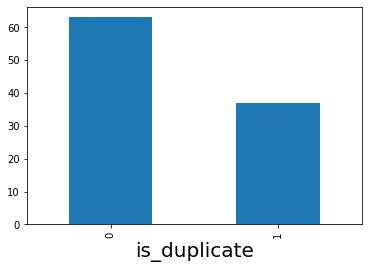

In [20]:
label_distribution.plot.bar()
plt.xlabel('is_duplicate', fontsize=20)

# Neural Embeddings

## Word2Vec (Context-free models)

### Tokenization

In [21]:
import nltk

In [22]:
tokenizer = nltk.RegexpTokenizer(r'\w+') # only alphanumeric characters+underscore

In [23]:
def get_tokens(input_sentences):
  output_tokens = [tokenizer.tokenize(str(input_sentence)) for input_sentence in input_sentences]
  return output_tokens

In [24]:
train_question1_tokens = get_tokens(train_question1)
train_question2_tokens = get_tokens(train_question2)

In [25]:
test_question1_tokens = get_tokens(test_question1)
test_question2_tokens = get_tokens(test_question2)

In [26]:
questions_tokens = get_tokens(questions)

In [27]:
train_question1_tokens[-3]

['What', 'is', 'one', 'coin']

In [28]:
train_question1[-3]

'What is one coin?'

### Word2Vec

In [29]:
!pip install gensim

In [30]:
from gensim.models import Word2Vec

In [31]:
word2vec = Word2Vec(sentences=questions_tokens, size=100, window=8, iter=10, min_count=1)

It tooks too long time to train our word embeddings based on local text

In [32]:
# Check all vocabulary output: a dictionary, key = word, value = gensim
# word2vec.wv.vocab 

In [33]:
len(word2vec.wv.vocab)

147218

In [34]:
# list(dictionary) == list(dictionary.keys())
list(word2vec.wv.vocab)[:5]

['What', 'is', 'the', 'step', 'by']

In [35]:
word2vec['What']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.299699  ,  1.3063995 ,  0.3023125 , -1.7850772 ,  0.7194483 ,
        0.94667315, -3.5073943 ,  0.21355024,  0.26386973, -2.7489545 ,
       -6.2882338 , -1.843759  , -1.5351849 , -2.8345363 ,  0.06623215,
        0.46494484,  0.335346  ,  3.273055  ,  1.7531027 , -2.6768892 ,
       -0.2658798 ,  0.16627121, -1.2978561 ,  2.4680336 , -3.518333  ,
       -2.7044985 , -2.8595955 ,  3.4859288 ,  0.9975468 , -0.6183054 ,
        0.35883158, -2.616036  ,  0.5595254 ,  1.0343142 , -0.85636026,
       -0.2793661 , -2.2215018 ,  2.2119215 , -0.75397843, -1.9020908 ,
        2.9844036 , -2.1030471 ,  0.85108256,  7.300147  ,  3.5395231 ,
        0.9177576 ,  0.7440439 ,  2.5356762 , -0.9665777 ,  0.0236449 ,
        0.9172069 , -1.1881323 ,  3.2029269 , -0.34007916, -0.5542084 ,
       -4.0597634 , -0.7327803 , -0.36639237, -2.339799  ,  0.4037962 ,
        2.581997  ,  1.5890956 , -2.4937086 , -0.7349312 ,  3.4569705 ,
       -2.476629  , -3.1745195 , -2.8674061 , -1.1985439 ,  0.59

In [36]:
word2vec['What'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(100,)

## GloVe (Context-free models)

In [37]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Format Converter

In [38]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [39]:
glove_input_file = '/content/gdrive/My Drive/NLP/GloVe/glove.6B.100d.txt'
glove_output_file = '/content/gdrive/My Drive/NLP/GloVe/glove.6B.100d.word2vec'

_ = glove2word2vec(glove_input_file, glove_output_file)

## TF-IDF

$$TF = \frac{\text{number of documents including the term at least once (df)}}{\text{total number of documents (N)}}$$ <br>
$$IDF = \log(\frac{\text{total number of documents (N)}}{\text{number of documents including the term at least once (df)+1}})$$

In [42]:
from gensim import corpora
from gensim.models import TfidfModel

In [43]:
dictionary = corpora.Dictionary(questions_tokens)  
# dictionary {id_1: word_1, id_2: word_2, ...}

In [44]:
# convert documents into Bag of words (BoW) | create a dictionary = {id_1: count_1, id_2:count_2, ...}
new_corpus = [dictionary.doc2bow(question_tokens) for question_tokens in questions_tokens]
new_corpus[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1)],
 [(0, 1),
  (6, 1),
  (10, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)]]

In [45]:
tfidf = TfidfModel(new_corpus)

In [46]:
questions_tokens[:2]

[['What',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['What',
  'is',
  'the',
  'story',
  'of',
  'Kohinoor',
  'Koh',
  'i',
  'Noor',
  'Diamond']]

In [47]:
tfidf[dictionary.doc2bow(['What','is','the'])] # (token_id, tfidf) 

[(0, 0.501933419269464), (6, 0.6974694987042012), (10, 0.5114676343599609)]

In [48]:
def get_sentences_tfidfs(input_sentences_tokens):
  output_vectors = []
  for q in input_sentences_tokens:
    result = tfidf[dictionary.doc2bow(q)] 
    output_vectors.append(result)
  return output_vectors

In [49]:
train_question1_tfidfs = get_sentences_tfidfs(train_question1_tokens)

In [50]:
train_question2_tfidfs = get_sentences_tfidfs(train_question2_tokens)

In [51]:
test_question1_tfidfs = get_sentences_tfidfs(test_question1_tokens)

In [52]:
test_question2_tfidfs = get_sentences_tfidfs(test_question2_tokens)

In [53]:
print(train_question1_tokens[1])
print(train_question1_tfidfs[1])

['What', 'is', 'the', 'story', 'of', 'Kohinoor', 'Koh', 'i', 'Noor', 'Diamond']
[(0, 0.042771767707761914), (6, 0.05943418436900267), (10, 0.0435842165654612), (12, 0.43328494784164856), (13, 0.45889625571481407), (14, 0.46283417927802106), (15, 0.4937812582286423), (16, 0.24594725283452387), (17, 0.07489974921213495), (18, 0.2651066163866776)]


In [54]:
train_question1_tfidfs[-3]

[(0, 0.10408817142536196),
 (6, 0.14463736017168763),
 (44, 0.39015569626095),
 (9414, 0.903340588752118)]

6## Construct TF-IDF & Word2Vec Features

In [56]:
train_question1_tfidfs[0]

[(0, 0.0471437383549434),
 (1, 0.18444692651588007),
 (2, 0.38464736052412407),
 (3, 0.14312735435812024),
 (4, 0.2628754528649872),
 (5, 0.2913186440728891),
 (6, 0.06550932513184979),
 (7, 0.2747741024579848),
 (8, 0.3043162664178286),
 (9, 0.6793221274795865),
 (10, 0.04803923270616697),
 (11, 0.07183816378429946)]

In [57]:
dictionary[0]  # (id_1, word_1)

'What'

In [58]:
word2vec['What']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 2.299699  ,  1.3063995 ,  0.3023125 , -1.7850772 ,  0.7194483 ,
        0.94667315, -3.5073943 ,  0.21355024,  0.26386973, -2.7489545 ,
       -6.2882338 , -1.843759  , -1.5351849 , -2.8345363 ,  0.06623215,
        0.46494484,  0.335346  ,  3.273055  ,  1.7531027 , -2.6768892 ,
       -0.2658798 ,  0.16627121, -1.2978561 ,  2.4680336 , -3.518333  ,
       -2.7044985 , -2.8595955 ,  3.4859288 ,  0.9975468 , -0.6183054 ,
        0.35883158, -2.616036  ,  0.5595254 ,  1.0343142 , -0.85636026,
       -0.2793661 , -2.2215018 ,  2.2119215 , -0.75397843, -1.9020908 ,
        2.9844036 , -2.1030471 ,  0.85108256,  7.300147  ,  3.5395231 ,
        0.9177576 ,  0.7440439 ,  2.5356762 , -0.9665777 ,  0.0236449 ,
        0.9172069 , -1.1881323 ,  3.2029269 , -0.34007916, -0.5542084 ,
       -4.0597634 , -0.7327803 , -0.36639237, -2.339799  ,  0.4037962 ,
        2.581997  ,  1.5890956 , -2.4937086 , -0.7349312 ,  3.4569705 ,
       -2.476629  , -3.1745195 , -2.8674061 , -1.1985439 ,  0.59

In [59]:
a = train_question1_tfidfs[0]
[word2vec[dictionary[item[0]]]*item[1] for item in a][:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[array([ 0.10841641,  0.06158856,  0.01425214, -0.08415522,  0.03391748,
         0.04462971, -0.16535167,  0.01006756,  0.01243981, -0.129596  ,
        -0.29645085, -0.08692169, -0.07237435, -0.13363063,  0.00312243,
         0.02191924,  0.01580947,  0.15430406,  0.08264782, -0.12619856,
        -0.01253457,  0.00783865, -0.06118579,  0.11635233, -0.16586737,
        -0.12750018, -0.13481203,  0.16433972,  0.04702809, -0.02914923,
         0.01691666, -0.12332971,  0.02637812,  0.04876143, -0.04037203,
        -0.01317036, -0.1047299 ,  0.10427824, -0.03554536, -0.08967167,
         0.14069594, -0.0991455 ,  0.04012321,  0.34415624,  0.16686635,
         0.04326652,  0.03507701,  0.11954126, -0.04556809,  0.00111471,
         0.04324056, -0.056013  ,  0.15099795, -0.0160326 , -0.02612746,
        -0.19139242, -0.034546  , -0.01727311, -0.11030687,  0.01903646,
         0.12172499,  0.07491591, -0.11756275, -0.0346474 ,  0.1629745 ,
        -0.11675755, -0.14965872, -0.13518025, -0.0

In [60]:
np.array([word2vec[dictionary[item[0]]]*item[1] for item in a]).sum(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-1.7184016 , -1.3977584 ,  2.1193743 , -3.4112148 , -0.35131112,
        1.076861  , -1.3592751 ,  1.8519238 , -3.4094908 , -1.8461145 ,
        2.9666266 ,  0.44609594,  2.190119  , -3.7629445 ,  4.8924007 ,
        0.09729548,  1.4981079 ,  1.1675029 ,  1.9686162 , -1.9377089 ,
        1.469815  ,  1.4923294 , -0.7718374 ,  3.609223  , -3.3924615 ,
       -2.0520215 ,  2.190445  ,  0.79256576,  0.5178707 , -4.3628526 ,
        0.9066396 , -4.179386  , -2.37913   ,  0.15150711,  0.70926255,
        0.7556713 , -3.4235168 ,  1.1523739 ,  0.9479876 ,  2.7597334 ,
       -1.0661465 , -0.606481  ,  1.6530702 ,  5.4069004 , -3.1494534 ,
       -2.656195  ,  3.0763836 , -0.02459431,  1.4335794 ,  1.9762459 ,
        2.4241574 ,  0.04680601,  4.3652973 , -3.1176617 ,  2.441427  ,
       -3.372045  , -2.9740074 , -3.4557433 ,  2.5245724 , -0.27743572,
       -0.14582135, -3.5071027 ,  0.57668453, -0.8072064 , -2.1306825 ,
       -0.01993624, -1.2164193 , -1.2879641 ,  1.5544444 , -1.72

In [61]:
def get_features(input_sentences, sentence_tfidfs, word2vec, dictionary):
  output_features = []
  for p, tf_idf in zip(input_sentences, sentence_tfidfs):
    sentence_features = [word2vec[dictionary[x[0]]]*x[1] for x in tf_idf] # embedding * tf_idf
    output_features.append(np.array(sentence_features).sum(axis=0))
  return output_features

In [62]:
train_question1_features = get_features(train_question1, train_question1_tfidfs, word2vec, dictionary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [63]:
train_question2_features = get_features(train_question2, train_question2_tfidfs, word2vec, dictionary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [64]:
test_question1_features = get_features(test_question1, test_question1_tfidfs, word2vec, dictionary)
test_question2_features = get_features(test_question2, test_question2_tfidfs, word2vec, dictionary)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


## Concat sentence embeddings 

In [65]:
def fuse_question1_question2_by_concat(question1, question2):
  fused_results = []
  for q1, q2 in zip(question1, question2):
    f = np.zeros(200)
    f[0:100] = q1
    f[100:200] = q2
    fused_results.append(f)
  return np.array(fused_results)

In [66]:
train_features = fuse_question1_question2_by_concat(train_question1_features, train_question2_features) 
test_features = fuse_question1_question2_by_concat(test_question1_features, test_question2_features)

In [67]:
len(train_features)

404287

In [68]:
train_features[-1].shape

(200,)

In [69]:
type(train_features[-1])

numpy.ndarray

In [70]:
test_features.shape

(400000, 200)

In [71]:
label = train_set['is_duplicate']

In [72]:
len(label)

404287

In [73]:
train_set['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

## Train & Validate

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train_features, 
                                                    label, 
                                                    test_size=0.3, 
                                                    stratify=label, 
                                                    random_state=0)

### Neural Network

In [76]:
import tensorflow as tf

In [77]:
tf.__version__

'2.5.0'

In [78]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation

#### Early stop (BEST - val_accuracy: 0.792)
* stop the model training if it **no longer improves**

In [86]:
from keras.callbacks import EarlyStopping

In [87]:
model_earlyStop=Sequential()
model_earlyStop.add(Dense(units=256, input_dim=200, activation='relu'))
model_earlyStop.add(Dense(units=256, input_dim=256, activation='relu'))
model_earlyStop.add(Dense(units=1, input_dim=256, activation='sigmoid'))
model_earlyStop.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['accuracy'])

In [89]:
model_earlyStop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               51456     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 117,505
Trainable params: 117,505
Non-trainable params: 0
_________________________________________________________________


In [92]:
monitor_val_acc = EarlyStopping(monitor='val_accuracy',patience = 5)

h_callback = model_earlyStop.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test), callbacks=[monitor_val_acc])

Epoch 1/50
8844/8844 [==============================] - 31s 4ms/step - loss: 0.4937 - accuracy: 0.7490 - val_loss: 0.4815 - val_accuracy: 0.7555
Epoch 2/50
8844/8844 [==============================] - 31s 3ms/step - loss: 0.4819 - accuracy: 0.7537 - val_loss: 0.5001 - val_accuracy: 0.7352
Epoch 3/50
8844/8844 [==============================] - 31s 3ms/step - loss: 0.4733 - accuracy: 0.7586 - val_loss: 0.4690 - val_accuracy: 0.7604
Epoch 4/50
8844/8844 [==============================] - 31s 4ms/step - loss: 0.4659 - accuracy: 0.7622 - val_loss: 0.4940 - val_accuracy: 0.7584
Epoch 5/50
8844/8844 [==============================] - 31s 3ms/step - loss: 0.4602 - accuracy: 0.7663 - val_loss: 0.4658 - val_accuracy: 0.7619
Epoch 6/50
8844/8844 [==============================] - 31s 4ms/step - loss: 0.4560 - accuracy: 0.7681 - val_loss: 0.4719 - val_accuracy: 0.7519
Epoch 7/50
8844/8844 [==============================] - 31s 3ms/step - loss: 0.4510 - accuracy: 0.7687 - val_loss: 0.5087 - val_ac

#### Plot loss and accuracy 

In [93]:
import matplotlib.pyplot as plt


In [96]:
def show_history(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_score = history.history['accuracy']
    val_score = history.history['val_accuracy']
    
    start = 1

    epochs = range(len(loss))

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs[start:], loss[start:], 'bo', label='Training loss')
    plt.plot(epochs[start:], val_loss[start:], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs[start:], train_score[start:], 'bo', label='Training accuracy')
    plt.plot(epochs[start:], val_score[start:], 'r', label='Validation accuracy')   
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    
    plt.tight_layout()
    plt.show() 

In [100]:
# show_history(h_callback)